# Recommendation of products 

In [6]:
import numpy as np
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import TruncatedSVD
import random

In [8]:
data = pd.read_csv('ratings_Beauty.csv')
data

,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200
1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200
2,A1Z513UWSAAO0F,0558925278,5.0,1404691200
3,A1WMRR494NWEWV,0733001998,4.0,1382572800
4,A3IAAVS479H7M7,0737104473,1.0,1274227200
...,...,...,...,...
2023065,A3DEHKPFANB8VA,B00LORWRJA,5.0,1405296000
2023066,A3DEHKPFANB8VA,B00LOS7MEE,5.0,1405296000
2023067,AG9TJLJUN5OM3,B00LP2YB8E,5.0,1405382400
2023068,AYBIB14QOI9PC,B00LPVG6V0,5.0,1405555200


In [9]:
data.shape

(2023070, 4)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2023070 entries, 0 to 2023069
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   UserId     object 
 1   ProductId  object 
 2   Rating     float64
 3   Timestamp  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 61.7+ MB


In [11]:
data.describe()

,Rating,Timestamp
count,2.023070e+06,2.023070e+06
mean,4.149036e+00,1.360389e+09
std,1.311505e+00,4.611860e+07
min,1.000000e+00,9.087552e+08
25%,4.000000e+00,1.350259e+09
50%,5.000000e+00,1.372810e+09
75%,5.000000e+00,1.391472e+09
max,5.000000e+00,1.406074e+09


In [12]:
data.isnull().sum()

UserId       0
ProductId    0
Rating       0
Timestamp    0
dtype: int64

In [13]:
data.UserId.nunique()

1210271

In [14]:
data.ProductId.nunique()

249274

<AxesSubplot: xlabel='Rating', ylabel='count'>

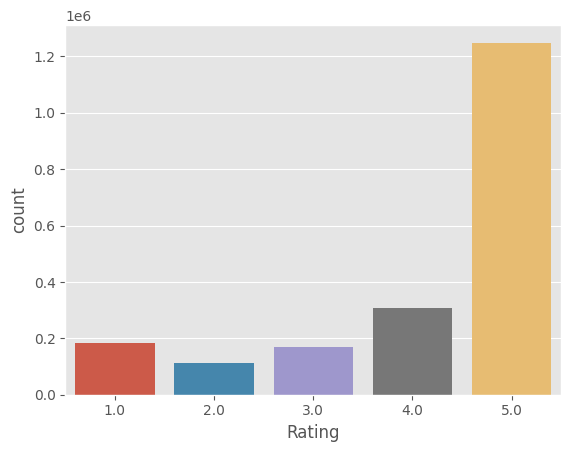

In [15]:
sns.countplot(x='Rating',data=data)

In [16]:
product_ratings = data.groupby('ProductId')['Rating'].count()
product_ratings.sort_values(ascending=False)

ProductId
B001MA0QY2    7533
B0009V1YR8    2869
B0043OYFKU    2477
B0000YUXI0    2143
B003V265QW    2088
              ... 
B004U81OBC       1
B004U7R0EI       1
B004U7Q2O2       1
B004U7NKRE       1
B00LU0LTOU       1
Name: Rating, Length: 249274, dtype: int64

In [17]:
user_ratings = data.groupby('UserId')['Rating'].count().sort_values(ascending = False)
user_ratings

UserId
A3KEZLJ59C1JVH    389
A281NPSIMI1C2R    336
A3M174IC0VXOS2    326
A2V5R832QCSOMX    278
A3LJLRIZL38GG3    276
                 ... 
A2G8M8PDTN09UZ      1
A2G8MAFIIQSJ42      1
A2G8MTKRE6MV52      1
A2G8MWBXG6JIY6      1
AZZZU2TD7Q3ET       1
Name: Rating, Length: 1210271, dtype: int64

In [18]:
len(data[data.Rating==5]['ProductId'].unique())

200831

In [21]:
rating = pd.DataFrame(data.groupby('ProductId')['Rating'].mean().sort_values(ascending=False))
rating['number of ratings'] = pd.DataFrame(data.groupby('ProductId')['Rating'].count().sort_values(ascending=False))

In [22]:
rating.sort_values('number of ratings',ascending=False)

,Rating,number of ratings
ProductId,,
B001MA0QY2,4.321386,7533
B0009V1YR8,3.568839,2869
B0043OYFKU,4.310456,2477
B0000YUXI0,4.405040,2143
B003V265QW,4.365421,2088
...,...,...
B0013H228W,5.000000,1
B0013GNAIE,5.000000,1
B0013GNAG6,5.000000,1


<AxesSubplot: xlabel='ProductId'>

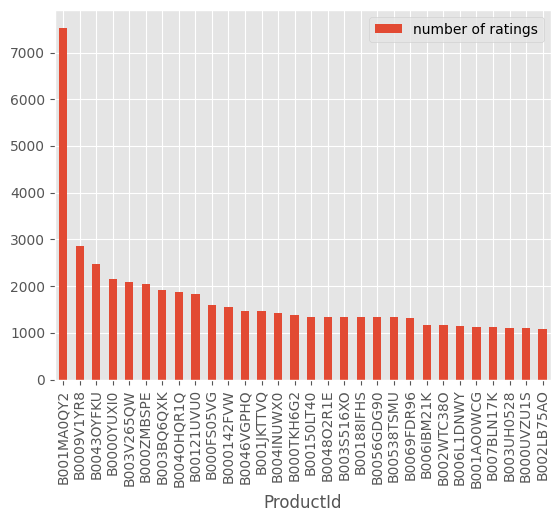

In [23]:
rating[['number of ratings']].sort_values('number of ratings',ascending=False).head(30).plot(kind = 'bar')

Collaborative filtering approach

In [25]:
new_df = data.groupby('ProductId').filter(lambda x: x['Rating'].count()>=50)
new_df

,UserId,ProductId,Rating,Timestamp
1705,A2SR9M2CWC2OCP,9790790961,4.0,1379894400
1706,A3V1EVBYP0U77W,9790790961,2.0,1397606400
1707,AVJKKAS4P52P9,9790790961,5.0,1404432000
1708,A2NQQDBBGFW1OT,9790790961,5.0,1390694400
1709,A1OFNEUHZ7BSCB,9790790961,5.0,1392336000
...,...,...,...,...
2022803,A2EIA53X91F8J,B00L5JHZJO,5.0,1399939200
2022804,A1MDF6GJDANUTH,B00L5JHZJO,5.0,1404604800
2022805,A3T20TGEE4OPB5,B00L5JHZJO,5.0,1400716800
2022806,A2MCFN2F0IINLY,B00L5JHZJO,5.0,1399939200


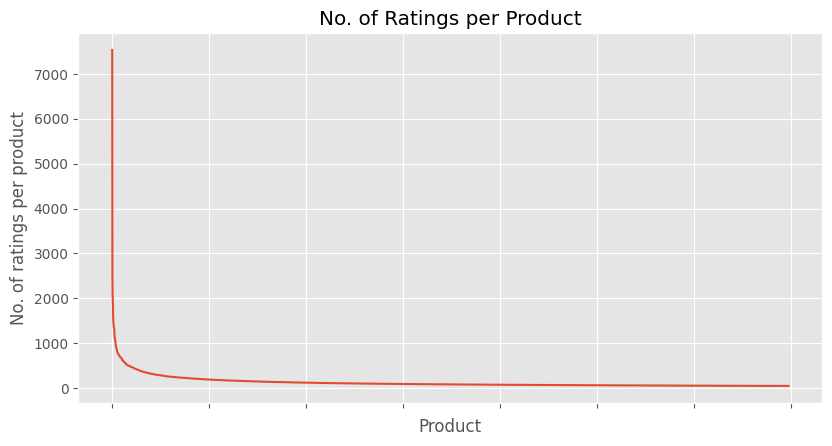

In [26]:
no_of_ratings_per_product = new_df.groupby(by='ProductId')['Rating'].count().sort_values(ascending=False)
fig = plt.figure(figsize=plt.figaspect(.5))
ax = plt.gca()
plt.plot(no_of_ratings_per_product.values)
plt.title('No. of Ratings per Product')
plt.xlabel('Product')
plt.ylabel('No. of ratings per product')
ax.set_xticklabels([])
plt.show()

In [27]:
ratings_df = data.head(15000)

In [28]:
ratings_utility_matrix = ratings_df.pivot_table(values='Rating',index = 'UserId',columns='ProductId',fill_value=0)

In [29]:
ratings_utility_matrix

ProductId,0205616461,0558925278,0733001998,0737104473,0762451459,1304139212,1304139220,130414089X,130414643X,1304146537,...,B0000535AW,B0000535B4,B0000535BD,B0000535CH,B0000535EM,B0000535EO,B0000535OF,B0000535QU,B0000535QX,B0000535RA
UserId,,,,,,,,,,,,,,,,,,,,,
A00205921JHJK5X9LNP42,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A00473363TJ8YSZ3YAGG9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A024581134CV80ZBLIZTZ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A03056581JJIOL5FSKJY7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A03099101ZRK4K607JVHH,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AZZHJZP4GQPPZ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AZZNK89PXD006,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AZZOFVMQC0BJG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
ratings_utility_matrix.shape

(14410, 1178)

In [31]:
t_ratings_utility_matrix = ratings_utility_matrix.T

In [32]:
t_ratings_utility_matrix

UserId,A00205921JHJK5X9LNP42,A00473363TJ8YSZ3YAGG9,A024581134CV80ZBLIZTZ,A03056581JJIOL5FSKJY7,A03099101ZRK4K607JVHH,A0505229A7NSH3FRXRR4,A05492663T95KW63BR75K,A059547920Q3LZVFHLPI3,A06298653TJ91G7R7MD6R,A065995424G4KBBX1V8BO,...,AZYQEFB9Y5N22,AZZ5ENX41WOYZ,AZZ8A0TEQOD7J,AZZDA9BRMPP1B,AZZHB6U54UDYW,AZZHJZP4GQPPZ,AZZNK89PXD006,AZZOFVMQC0BJG,AZZQXL8VDCFTV,AZZTJQ7CQZUD8
ProductId,,,,,,,,,,,,,,,,,,,,,
0205616461,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0558925278,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0733001998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0737104473,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0762451459,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B0000535EO,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
B0000535OF,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
B0000535QU,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
svd = TruncatedSVD(n_components=10)
decomposed_matrix = svd.fit_transform(t_ratings_utility_matrix)
decomposed_matrix.shape

(1178, 10)

In [34]:
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix

array([[ 1.        ,  0.55948365, -0.83240729, ..., -0.88405089,
         0.8810766 ,  0.67996613],
       [ 0.55948365,  1.        , -0.59927288, ..., -0.607005  ,
         0.65357939,  0.62765234],
       [-0.83240729, -0.59927288,  1.        , ...,  0.98145068,
        -0.89424943, -0.95646227],
       ...,
       [-0.88405089, -0.607005  ,  0.98145068, ...,  1.        ,
        -0.95962308, -0.90563766],
       [ 0.8810766 ,  0.65357939, -0.89424943, ..., -0.95962308,
         1.        ,  0.78874893],
       [ 0.67996613,  0.62765234, -0.95646227, ..., -0.90563766,
         0.78874893,  1.        ]])

In [35]:
correlation_matrix.shape

(1178, 1178)

In [36]:
# choosing any random index
y = random.randint(0,correlation_matrix.shape[0])
y

165

In [37]:
productId = t_ratings_utility_matrix.index[y]
productId

'9744434139'

In [38]:
correlated_productIds = correlation_matrix[y]
correlated_productIds

array([ 0.77233605,  0.85576577, -0.82002819, ..., -0.8731866 ,
        0.9353317 ,  0.78314935])

In [39]:
recommended_products = t_ratings_utility_matrix[correlated_productIds>0.90]
recommended_products= list(recommended_products)

In [40]:
# top 10 recommended products for the product chosen using a random index
recommended_products[0:10]

['A00205921JHJK5X9LNP42',
 'A00473363TJ8YSZ3YAGG9',
 'A024581134CV80ZBLIZTZ',
 'A03056581JJIOL5FSKJY7',
 'A03099101ZRK4K607JVHH',
 'A0505229A7NSH3FRXRR4',
 'A05492663T95KW63BR75K',
 'A059547920Q3LZVFHLPI3',
 'A06298653TJ91G7R7MD6R',
 'A065995424G4KBBX1V8BO']